# Imports

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data=datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)
test_data=datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [7]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
# For Loading Data And Other Tranformation We Are Using DataLoader from the torch lib

from torch.utils.data import DataLoader

In [9]:
""" loaders={
    "train":DataLoader(
        train_data,
        batch_size=100,
        shuffle=True,
        num_workers=1
    ),
      "test":DataLoader(
        test_data,
        batch_size=100,
        shuffle=True,
        num_workers=1
    )
} """
loaders={
    "train":DataLoader(
        train_data,
        batch_size=100,
        shuffle=True,
        num_workers=0,
    ),
      "test":DataLoader(
        test_data,
        batch_size=100,
        shuffle=True,
        num_workers=0,
    )
}

In [10]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1c439687ef0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1c431047e60>}

In [11]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [12]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        '''
            20*4*4 => 320 nurons
        '''
        self.conv1=nn.Conv2d(1,10,kernel_size=5)
        self.conv2=nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop=nn.Dropout2d()
        # in    : 320
        # out   : 50
        # same as tensor flow dence layer
        self.fc1=nn.Linear(320,50)
        # out   : 10 For SoftMax
        self.fc2=nn.Linear(50,10)

    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),stride=2,kernel_size=2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),stride=2,kernel_size=2))
        # Reshaping Data => Flating
        x=x.view(x.size(0),-1)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)

        # propb. of ech individual digits
        return F.log_softmax(x,dim=1)

In [13]:
import torch

# for loading the model to GPU if it's support cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model=CNN().to(device)

optimizer=optim.Adam(model.parameters(),lr=0.001)

loss_fn=nn.CrossEntropyLoss()

In [14]:
def train(epoch):
    model.train()
    for batch_idx,(data,target) in enumerate(loaders['train']):
        data,target=data.to(device),target.to(device)
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx%20==0:
            print(f'Train Epoch: {epoch+1} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f} \n')


def test():
    model.eval()
    test_loss=0
    correct=0

    with torch.no_grad():
        for data,target in loaders['test']:
            data,target=data.to(device), target.to(device)
            output=model(data)
            test_loss+=loss_fn(output,target)
            pred=output.argmax(dim=1,keepdim=True)
            correct+=pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(loaders['test'].dataset)
        print(f'''\nTest Set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset):.0f}%)\n''')


In [15]:
for epoch in range(25):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.294633 

Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.182065 

Train Epoch: 1 [4000/60000 (7%)]	Loss: 1.678956 

Train Epoch: 1 [6000/60000 (10%)]	Loss: 1.298463 

Train Epoch: 1 [8000/60000 (13%)]	Loss: 0.961877 

Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.840091 

Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.549554 

Train Epoch: 1 [14000/60000 (23%)]	Loss: 0.649267 

Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.597045 

Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.577169 

Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.372926 

Train Epoch: 1 [22000/60000 (37%)]	Loss: 0.691734 

Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.665170 

Train Epoch: 1 [26000/60000 (43%)]	Loss: 0.413916 

Train Epoch: 1 [28000/60000 (47%)]	Loss: 0.427670 

Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.445265 

Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.426138 

Train Epoch: 1 [34000/60000 (57%)]	Loss: 0.514144 

Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.249311 

Train Epoch: 1 [38000/6

Prediction: 7


<function matplotlib.pyplot.show(close=None, block=None)>

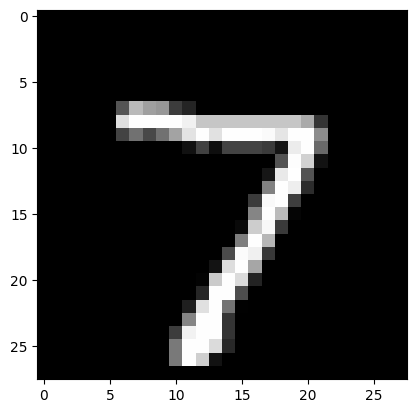

In [18]:
import matplotlib.pyplot as plt

model.eval()

data,target=test_data[0]

data=data.unsqueeze(0).to(device)

output=model(data)

prediction = output.argmax(dim=1,keepdim=True).item()

print(f"Prediction: {prediction}")

image=data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image,cmap='grey')
plt.show

Prediction: 7 || Actual: 7
Prediction: 2 || Actual: 2
Prediction: 1 || Actual: 1
Prediction: 0 || Actual: 0
Prediction: 4 || Actual: 4
Prediction: 1 || Actual: 1
Prediction: 4 || Actual: 4
Prediction: 9 || Actual: 9
Prediction: 5 || Actual: 5
Prediction: 9 || Actual: 9
Prediction: 0 || Actual: 0
Prediction: 6 || Actual: 6
Prediction: 9 || Actual: 9
Prediction: 0 || Actual: 0
Prediction: 1 || Actual: 1
Prediction: 5 || Actual: 5
Prediction: 9 || Actual: 9
Prediction: 7 || Actual: 7
Prediction: 3 || Actual: 3
Prediction: 4 || Actual: 4
Prediction: 9 || Actual: 9
Prediction: 6 || Actual: 6
Prediction: 6 || Actual: 6
Prediction: 5 || Actual: 5
Prediction: 4 || Actual: 4
Prediction: 0 || Actual: 0
Prediction: 7 || Actual: 7
Prediction: 4 || Actual: 4
Prediction: 0 || Actual: 0
Prediction: 1 || Actual: 1
Prediction: 3 || Actual: 3
Prediction: 1 || Actual: 1
Prediction: 3 || Actual: 3
Prediction: 4 || Actual: 4
Prediction: 7 || Actual: 7
Prediction: 2 || Actual: 2
Prediction: 7 || Actual: 7
P

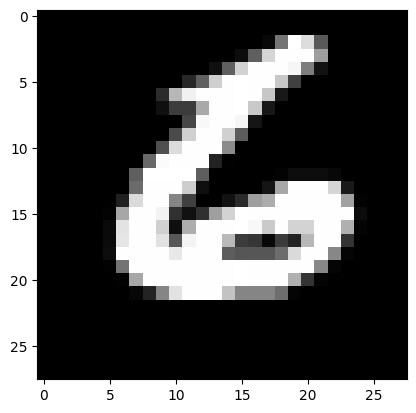

In [20]:
import matplotlib.pyplot as plt

model.eval()
for idx,(data,target) in enumerate(test_data):

# data,target=test_data[0]

    data=data.unsqueeze(0).to(device)

    output=model(data)

    prediction = output.argmax(dim=1,keepdim=True).item()

    print(f"Prediction: {prediction} || Actual: {target}")

    image=data.squeeze(0).squeeze(0).cpu().numpy()

    plt.imshow(image,cmap='grey')
    plt.show

In [ ]:
torch.cuda.is_available()

In [ ]:
torch.cuda.is_available()
torch.zeros(5).cuda()
torch.cuda.get_device_name(0)